In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [65]:
# Cargar el nuevo conjunto de datos
data_np = pd.read_csv('/content/drive/MyDrive/IA/laboratorios/segundoparcialMontañoMolinaJuanJose/Flight_delay.csv', sep=",")
data_np = data_np.drop(data_np.columns[0], axis=1)
data_np['Date'] = 1
data_np['UniqueCarrier'] = 2
data_np['Airline'] = 3
data_np['TailNum'] = 4
data_np['Origin'] = 5
data_np['Org_Airport'] = 6
data_np['Dest_Airport'] = 7
data_np['Dest'] = 8
data_np['CancellationCode'] = 9
data = data_np.to_numpy()

# Extract features and labels from the dataset
X = data[:1000, 1:]  # Features
y = data[:1000, 0]   # Labels

# Tamaño del conjunto de datos
m = y.size

# Preprocess for testing (test dataset)
X_test = data[1000:25000, 1:]  # Test features
Y_test = data[1000:25000, 0]   # Test labels

# Replace label '10' with '0'
y[y == 25] = 0
Y_test[Y_test == 25] = 0


# Create a Pandas DataFrame for training data
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)
# Size of the dataset
m = y.size

# Number of clusters for K-Means
k = 50

In [66]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X)
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.266106751366866

# Minibach

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

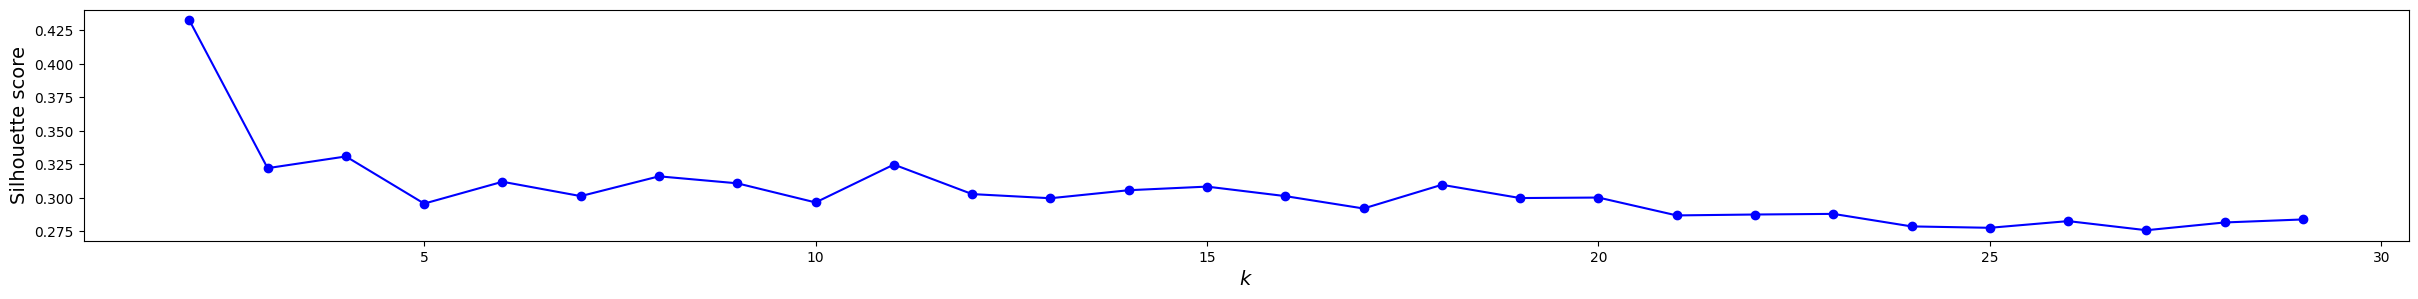

In [67]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 30)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(30, 3))
plt.plot(range(2, 30), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [68]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

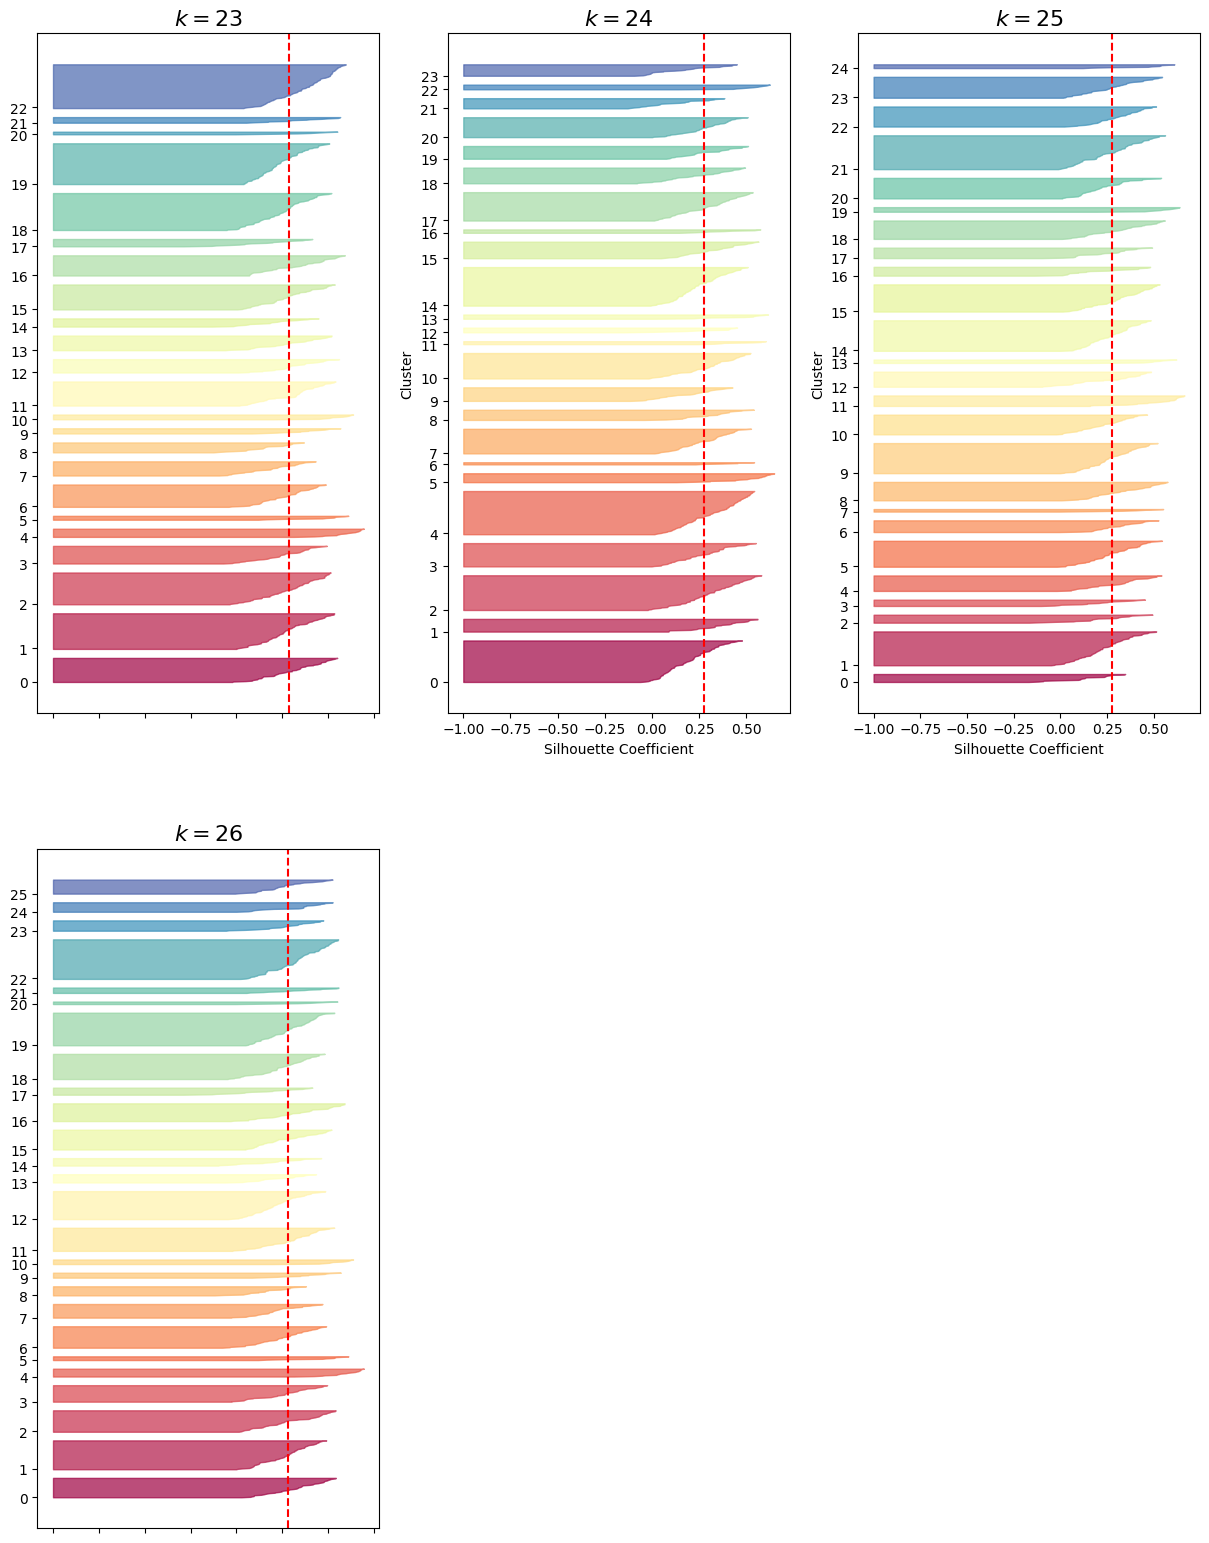

In [69]:
plt.figure(figsize=(15, 30))

for k in (23, 24, 25, 26):
    plt.subplot(3, 3, k - 22)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)),  -1,coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 50)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (24, 25):
        plt.ylabel("Cluster")

    if k in (24, 25):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()